In [49]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from adaptnn.visual_neuron_convnets import FullFieldStimulusPopulation

In [50]:
test_layer = torch.nn.Conv1d(in_channels=1,out_channels=3,kernel_size=5,stride=1,padding='valid')
test_stim = np.zeros((1,100))
test_stim[0,0] = 1
test_stim = torch.Tensor(test_stim)

In [51]:
with torch.no_grad():
    for ii in range(3):
        test_layer.weight[ii,0][:] = 0;
        test_layer.weight[ii,0][ii] = 1;
        test_layer.bias[ii] = ii/10
test_layer.weight


Parameter containing:
tensor([[[1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0.]],

        [[0., 0., 1., 0., 0.]]], requires_grad=True)

In [57]:
with torch.no_grad():
    A = test_layer(test_stim)
    f = A.numpy().T
    print(A.shape)
    print(torch.transpose(A,dim0=-1, dim1=-2).shape)

torch.Size([3, 96])
torch.Size([96, 3])


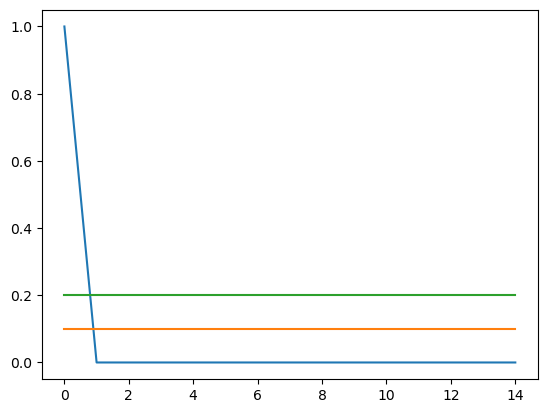

In [53]:
plt.plot(f[:15,:])